# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [1]:
import tensorflow as tf
import numpy as np

In [39]:
arr = np.arange(9)  #0 ~ 8: 9

In [40]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체를 생성
dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [41]:
# 각각 원소를 변환 작업을 Dataset 추가. - Dataset.map(변환함수)\
dataset = dataset.map(lambda x:x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [42]:
# dataset = dataset.filter(lambda x : x%2 == 0) #2에 배수만 걸러내기
# def func(x):
#     return x%2 == 0

In [43]:
dataset = dataset.shuffle(9) #값들을 섞는 작업

In [44]:
dataset = dataset.batch(4) #한번에 지정한 개수(3)만큼 제공

In [45]:
for a in dataset:
    print(a)

tf.Tensor([ 1 16 36 25], shape=(4,), dtype=int32)
tf.Tensor([ 0  4 64 49], shape=(4,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [29]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)


In [46]:
x = np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [48]:
ds = tf.data.Dataset.from_tensor_slices((x,y))

In [50]:
for a in ds:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [55]:
ds2 = ds.map(lambda x, y : (x**2, y**3))   #x:2제곱, y: 3제곱
# def map_func(x, y): #dataset에 두개의 배열을 넣었을 경우 변수 두개로 각각 받는다. 
#     return (x**2, y**3)

In [56]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [59]:
ds3 = ds2.shuffle(10)

In [60]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [61]:
ds4 = ds3.batch(4)

In [62]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([14, 15, 16, 17])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18, 19])>)


In [64]:
for a in ds4.repeat(3): #dataset.repeat(count) count횟수만큼 반복. count생략시 무한제공
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([14, 15, 16, 17])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18, 19])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([14, 15, 16, 17])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([18, 19])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([10, 11, 12, 13])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <

In [84]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y : (x**2, y**3)).shuffle(10).batch(4)#.repeat(3)

In [85]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64,  0, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 1000, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 36, 49, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 4096, 4913, 3375])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1728, 2744])>)


In [88]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y : (x**2, y**3)).shuffle(10).batch(4, drop_remainder=True)#.repeat(3)

In [89]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 16, 81, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 2744, 6859, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9, 64, 36,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 5832, 4096, 1331])>)


# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
#데이터셋 로딩
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
y_train[:5] #회귀(Regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [5]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
# 하이퍼파라미터 값들을 설정
LEARNING_RATE = 0.001 #학습률
N_EPOCHS = 200 #에폭 횟수. 1 epoch 전체 데이터셋을 한번 사용한것.
N_BATCHS = 32  #batch_size. 32개 데이터셋 마다 파라미터들(가중치) 업데이트. 

N_TRAIN = X_train.shape[0] #train set의 개수
N_TEST = X_test.shape[0]  #test set 의 개수
N_FEATURES = X_train.shape[1] #input data의  feature(컬럼) 개수

In [7]:
# Dataset 생성
# drop_remainder=True: 마지막에 batch size보다 제공할 데이터가 적으면 학습시 제공하지 말고 버려라.
# repeat(): 여러 epoch을 돌때마다 계속 데이터를 제공하게 하기 위해.  repeat()를 지정하지 않으면 1 에폭후 데이터를 제공하지 못한다.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [8]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    # 입력 Layer를 따로 정의.
    # 첫번째 Layer를 만들때 input_shape(1개의 입력데이터의 형태)를 지정하면 입력 Layer층이 자동으로 생성된다.
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES,))) 
    model.add(keras.layers.Dense(units=8, activation='relu'))
    # 출력 Layer 
    model.add(keras.layers.Dense(units=1)) #회귀의 출력층: units수는 1, activation 함수는 사용하지 않는다.
    
    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), # optimizer의 하이퍼파라미터를 기본값으로 쓸경우 문자열로 "adam"으로 선언하면됨.
                  loss='mse') #회귀의 Loss 함수: mse
    return model

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 1 step: 한번 가중치를 업데이트. batch size
# 1 epoch: 전체 train 데이터를 한번 학습
steps_per_epoch = N_TRAIN // N_BATCHS  # 학습데이터개수 // 배치수
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [13]:
history = model.fit(train_dataset,  #train dataset (X_train, y_train)
                    epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch, #1에폭당 step 수 tf2.4 step수 지정은 생략
                    validation_data=val_dataset, #검증 Dataset 지정.
                    validation_steps=validation_steps)

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 1s 71ms/step - loss: 402.1756 - val_loss: 239.0792
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 151.8999 - val_loss: 120.9074
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 81.3070 - val_loss: 104.4386
Epoch 4/200
12/12 [==============================] - 0s 11ms/step - loss: 77.1330 - val_loss: 99.5287
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 73.2870 - val_loss: 102.3875
Epoch 6/200
12/12 [==============================] - 0s 9ms/step - loss: 73.6594 - val_loss: 96.8372
Epoch 7/200
12/12 [==============================] - 0s 10ms/step - loss: 68.5961 - val_loss: 105.7052
Epoch 8/200
12/12 [==============================] - 0s 11ms/step - loss: 68.1735 - val_loss: 96.7148
Epoch 9/200
12/12 [==============================] - 0s 8ms/step - loss: 64.4891 - val_loss: 99.6242
Epoch 10/200
12/12 [===================

Epoch 81/200
12/12 [==============================] - 0s 7ms/step - loss: 40.6395 - val_loss: 53.9089
Epoch 82/200
12/12 [==============================] - 0s 5ms/step - loss: 41.8409 - val_loss: 63.6541
Epoch 83/200
12/12 [==============================] - 0s 6ms/step - loss: 41.3783 - val_loss: 53.3382
Epoch 84/200
12/12 [==============================] - 0s 5ms/step - loss: 39.6774 - val_loss: 55.3795
Epoch 85/200
12/12 [==============================] - 0s 7ms/step - loss: 41.2063 - val_loss: 53.4620
Epoch 86/200
12/12 [==============================] - 0s 5ms/step - loss: 40.0407 - val_loss: 50.9151
Epoch 87/200
12/12 [==============================] - 0s 4ms/step - loss: 35.3876 - val_loss: 57.0341
Epoch 88/200
12/12 [==============================] - 0s 6ms/step - loss: 40.0828 - val_loss: 55.3768
Epoch 89/200
12/12 [==============================] - 0s 4ms/step - loss: 41.4325 - val_loss: 53.9549
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 36.9179 

12/12 [==============================] - 0s 9ms/step - loss: 33.3250 - val_loss: 42.3829
Epoch 161/200
12/12 [==============================] - 0s 8ms/step - loss: 33.8451 - val_loss: 43.0780
Epoch 162/200
12/12 [==============================] - 0s 8ms/step - loss: 34.4304 - val_loss: 42.0786
Epoch 163/200
12/12 [==============================] - 0s 6ms/step - loss: 33.9570 - val_loss: 42.5185
Epoch 164/200
12/12 [==============================] - 0s 5ms/step - loss: 35.2657 - val_loss: 42.1647
Epoch 165/200
12/12 [==============================] - 0s 9ms/step - loss: 35.4410 - val_loss: 42.4210
Epoch 166/200
12/12 [==============================] - 0s 3ms/step - loss: 33.9625 - val_loss: 42.6780
Epoch 167/200
12/12 [==============================] - 0s 8ms/step - loss: 34.1748 - val_loss: 43.0065
Epoch 168/200
12/12 [==============================] - 0s 6ms/step - loss: 36.5509 - val_loss: 43.5831
Epoch 169/200
12/12 [==============================] - 0s 3ms/step - loss: 32.7472 - va

In [106]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [107]:
history.history

{'loss': [181.78847630818686,
  81.61240355173747,
  67.68961636225383,
  62.725273768107094,
  58.364725748697914,
  57.47626654307047,
  55.710411071777344,
  54.9445481300354,
  53.07378737131754,
  49.60516802469889,
  45.16101757685343,
  48.42178185780843,
  44.866048177083336,
  46.14997887611389,
  45.04022630055746,
  45.206780115763344,
  42.293067932128906,
  43.298407236735024,
  42.7181666692098,
  40.73722950617472,
  41.87421258290609,
  42.94605207443237,
  38.367398262023926,
  37.95941321055094,
  39.97140876452128,
  39.978199323018394,
  39.01988013585409,
  40.26947601636251,
  41.622082471847534,
  41.13294712702433,
  39.11203654607137,
  35.333151499430336,
  36.05694588025411,
  37.495836893717446,
  36.28750809033712,
  36.57054980595907,
  35.49892671902975,
  35.528158028920494,
  37.39146820704142,
  37.9907914797465,
  36.99765412012736,
  35.232038815816246,
  38.94888289769491,
  36.177913665771484,
  34.811867475509644,
  31.36833381652832,
  32.9529773

In [109]:
history.history['val_loss']

[151.73642539978027,
 81.04937744140625,
 88.01851081848145,
 77.14800834655762,
 77.14596366882324,
 69.93521118164062,
 75.24223804473877,
 71.3034439086914,
 70.39750671386719,
 69.89128065109253,
 66.47381782531738,
 69.24795246124268,
 62.020010471343994,
 63.150243282318115,
 59.62559175491333,
 58.14460372924805,
 61.47002983093262,
 59.17904853820801,
 57.25471115112305,
 57.00184631347656,
 64.16478490829468,
 57.60904836654663,
 51.57286739349365,
 52.35874652862549,
 54.52347993850708,
 56.08609485626221,
 58.65553092956543,
 60.48726511001587,
 50.622836112976074,
 50.81159210205078,
 49.027663230895996,
 50.46921157836914,
 49.68110275268555,
 48.16878700256348,
 48.64646244049072,
 49.906835079193115,
 49.03521728515625,
 45.07792043685913,
 48.627707958221436,
 46.43245506286621,
 44.633588790893555,
 45.84303951263428,
 48.67421531677246,
 45.165663719177246,
 43.09549522399902,
 42.430864334106445,
 46.91767072677612,
 48.31717014312744,
 48.48082637786865,
 50.4564681

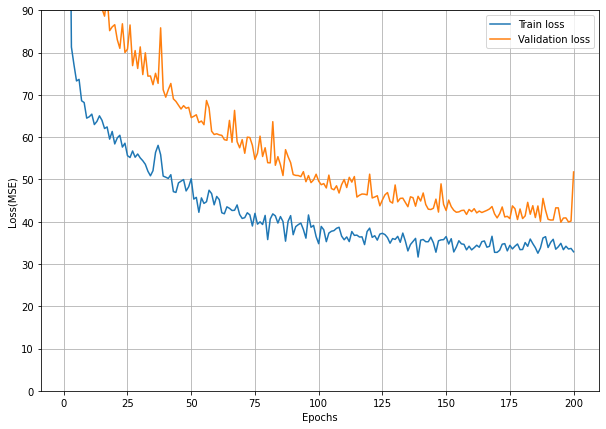

In [16]:
# epoch당 loss와 val_loss  변화에 대해 선그래프 그리기.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 90)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# 평가
model.evaluate(val_dataset) 

4/4 [==============================] - 0s 2ms/step - loss: 51.7618


51.76176357269287

## 2. Classification

### Fashion MNIST(MNIST) Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [18]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [21]:
# 데이터셋 읽기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [24]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

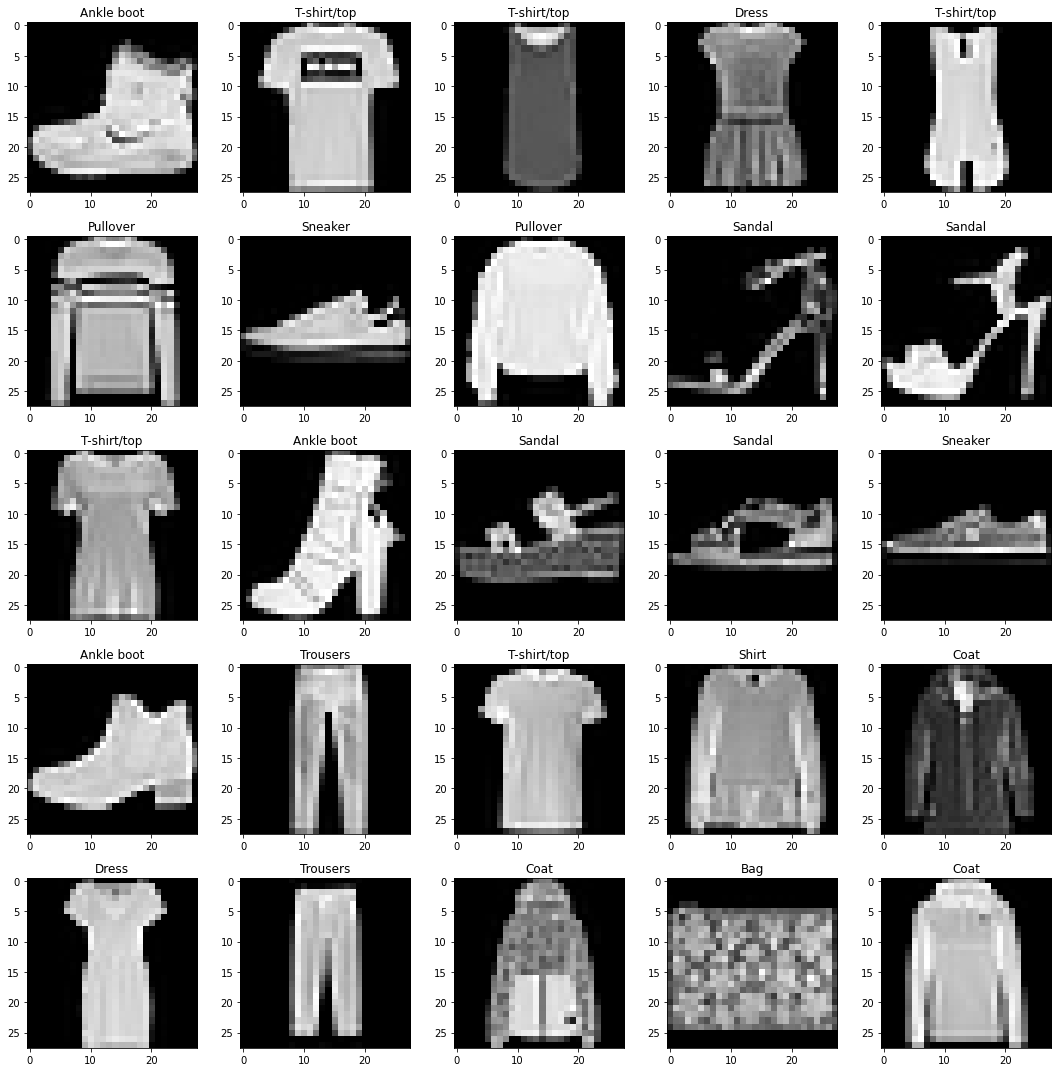

In [32]:
# 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    
plt.tight_layout()
plt.show()

In [39]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 50
N_BATCHS = 100

N_CLASS = 10 #CLASS CATEGORY의 개수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 28

In [35]:
# 데이터 전처리 
# X(이미지) : 0 ~ 255 => 0 ~ 1
X_train  = X_train/255.
X_test = X_test/255.

# Y (Label) => 다중분류: OneHotEncoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [36]:
np.max(X_train), np.min(X_train)

(1.0, 0.0)

In [37]:
y_test.shape

(10000, 10)

In [38]:
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
# Dataset 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()

In [47]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [ ]:
# from tensorflow.keras.layers import Flatten, Dense, Input

# model.add(Input((28,28)))
# model.add(Dense(...))

In [51]:
# 모델 구현
def create_model():
    model = keras.Sequential()
    #입력층(Input Layer)
    model.add(keras.layers.Input((28,28)))
    model.add(keras.layers.Flatten())
#     model.add(keras.layers.Flatten(input_shape=(28,28)))
    #은닉층(Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    
    #출력층(Output Layer)
    #다중 분류: units-class category 개수, activation-softmax =>각 class 별 확률   
    model.add(keras.layers.Dense(N_CLASS, activation='softmax')) 
    
    # 컴파일. 다중분류: loss-categorical_crossentropy (y를 one hot encoding을 한 경우),
    #                      sparse_categorical_entropy(y를 one hot encoding 안한 경우)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [52]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


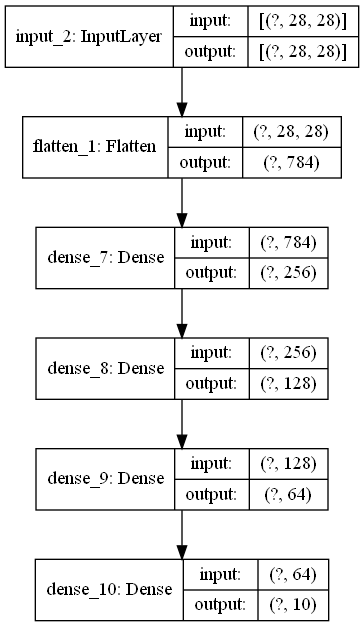

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='fashin_mnist_model.png', show_shapes=True)

In [55]:
# 학습
## 에폭당 step 수 계산
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
print(steps_per_epoch, validation_steps)

600 100


In [66]:
60000/85

705.8823529411765

In [56]:
## 학습
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset, 
                    validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/50
600/600 [==============================] - 7s 12ms/step - loss: 0.5087 - accuracy: 0.8203 - val_loss: 0.4186 - val_accuracy: 0.8469
Epoch 2/50
600/600 [==============================] - 7s 11ms/step - loss: 0.3657 - accuracy: 0.8672 - val_loss: 0.4053 - val_accuracy: 0.8528
Epoch 3/50
600/600 [==============================] - 7s 12ms/step - loss: 0.3306 - accuracy: 0.8795 - val_loss: 0.3651 - val_accuracy: 0.8687
Epoch 4/50
600/600 [==============================] - 7s 12ms/step - loss: 0.3064 - accuracy: 0.8870 - val_loss: 0.3492 - val_accuracy: 0.8744
Epoch 5/50
600/600 [==============================] - 7s 12ms/step - loss: 0.2872 - accuracy: 0.8926 - val_loss: 0.3583 - val_accuracy: 0.8720
Epoch 6/50
600/600 [==============================] - 8s 13ms/step - loss: 0.2738 - accuracy: 0.8974 - val_loss: 0.3434 - val_accuracy: 0.8782
Epoch 7/50
600/600 [==============================] - 8s 13ms/step - loss: 0.2589 - accuracy: 0.90

In [57]:
# 평가 - test set (마지막에 한번)
model.evaluate(val_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 0.5524 - accuracy: 0.8928


[0.5524337460100651, 0.8928]

In [ ]:
# 결과 시각화 (loss와 지정한 평가지표의 epoch당 변화를 시각화.)=>선그래프

In [58]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

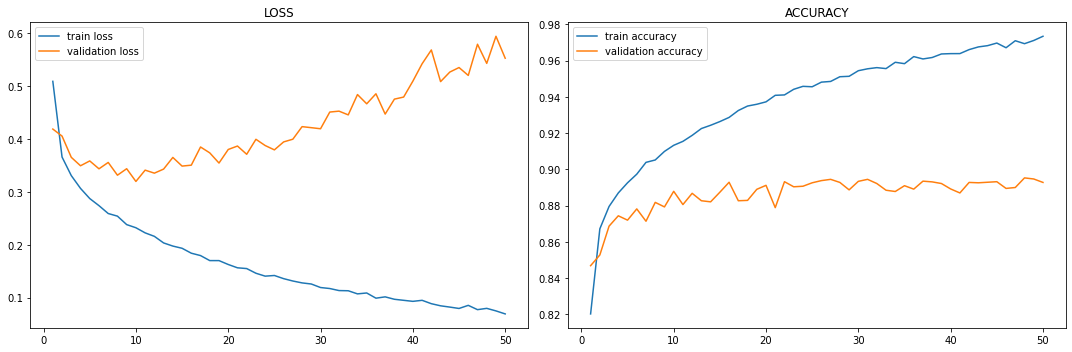

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label='train loss')
plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()

## IMDB 감성분성
### 이진분류(Binary Classification)
- 영화 댓글 - 부정(0)/긍정(1)

In [2]:
import pickle 
import os
# os.path.isfile('imdb_dataset/x_train.pkl')
# 데이터 로드
with open('imdb_dataset/x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('imdb_dataset/x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
    
with open('imdb_dataset/y_train.pkl', 'rb') as f:
    y_train= pickle.load(f)
    
with open('imdb_dataset/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    

In [3]:
X_train[0]

'day lead think even think boy young men commit mutual suicide slaughter classmate capture bizarre mode human decide withdraw common civility order define mutual world couple destruction perfect movie give money time filmmaker actor remarkable product term explain motif action young suicide murderer well elephant term film get rationalistic skin far far well film almost anything likely see flaw honest terrible honesty'

In [4]:
y_train[:5]

array([1, 0, 1, 0, 0])

In [5]:
# X-> 벡터화(숫자 변경)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
tfidf.fit(X_train+X_test)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
X_train_tfidf.shape, X_test_tfidf.shape

((25000, 10000), (25000, 10000))

In [7]:
X_train_tfidf

<25000x88065 sparse matrix of type '<class 'numpy.float64'>'
	with 2238040 stored elements in Compressed Sparse Row format>

In [8]:
y_train.shape

(25000,)

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 10
N_BATCHS = 50

N_TRAIN = X_train_tfidf.shape[0]
N_TEST = X_test_tfidf.shape[0]
N_FEATURE = X_train_tfidf.shape[1]

In [9]:
# Dataset 생성 - y: 이진분류 - one hot encoding (X)
# Sparse Matrix=>ndarray
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf.toarray(), y_train))\
                              .shuffle(N_TRAIN)\
                              .batch(N_BATCHS, drop_remainder=True)\
                              .repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test_tfidf.toarray(), y_test)).batch(N_BATCHS)

In [10]:
def create_model():
    model = keras.Sequential()
    # input layer
    model.add(keras.layers.Input((N_FEATURE, )))
    # Hidden layer
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    #Output Layer: 이진분류: units=1, activation='sigmoid' :logistic 함수
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 컴파일: 이진분류 - activation:sigmoid => loss: binary_crossentropy
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 5,350,657
Trainable params: 5,350,657
Non-trainable params: 0
_________________________________________________________________


In [16]:
plot_model(model, show_shapes=True)

NameError: name 'plot_model' is not defined

In [12]:
# 학습
import numpy as np
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
steps_per_epoch, validation_steps

(500, 500)

In [ ]:
history= model.fit(train_dataset, 
                  epochs=N_EPOCHS,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_dataset,
                  validation_steps=validation_steps)

Train for 500 steps, validate for 500 steps
Epoch 1/10
306/500 [=================>............] - ETA: 26s - loss: 0.3529 - accuracy: 0.8431